## 1. Import the necessary libraries

In [232]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2. Read the data as a data frame

In [233]:
insurance_df = pd.read_csv('D://PGP//Assignments//23Jul2020//insurance.csv')

## 3.Perform basic EDA which should include the following
## and print out your insights at every step.

 ## 3.a. Shape of the data

In [125]:
print('The dataSet contains',insurance_df.shape[0],' rows  and ',insurance_df.shape[1],' columns')

The dataSet contains 1338  rows  and  7  columns


## 3. b. Data type of each attribute

In [126]:
for x in insurance_df.columns:
    print(' Attribute name - ',x, ' is of dtypes - ',insurance_df.dtypes[x])

 Attribute name -  age  is of dtypes -  int64
 Attribute name -  sex  is of dtypes -  object
 Attribute name -  bmi  is of dtypes -  float64
 Attribute name -  children  is of dtypes -  int64
 Attribute name -  smoker  is of dtypes -  object
 Attribute name -  region  is of dtypes -  object
 Attribute name -  charges  is of dtypes -  float64


In [127]:
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


 ## 3.c. Checking the presence of missing values

In [128]:

def hasMissingValues(isMissing_insurance_df):
    isMissingValueCounter = 0
    for x in isMissing_insurance_df.columns:
             rowNumber =0
             for val in isMissing_insurance_df[x]:
                    rowNumber = rowNumber+1
                    if(val):
                        isMissingValueCounter =isMissingValueCounter+1
                        print ('There is a missing value for ',x,' in row# - ',rowNumber)
                    

    if(isMissingValueCounter == 0):
        print ('There are no missing values in the provided data set - Its a Clean Data Set')    

In [129]:
hasMissingValues(insurance_df.isna())

There are no missing values in the provided data set - Its a Clean Data Set


 ## 3.d. 5 point summary of numerical attributes

In [130]:
insurance_df.describe().iloc[3:10]

,age,bmi,children,charges
min,18.0,15.96000,0.0,1121.873900
25%,27.0,26.29625,0.0,4740.287150
50%,39.0,30.40000,1.0,9382.033000
75%,51.0,34.69375,2.0,16639.912515
max,64.0,53.13000,5.0,63770.428010


### Quantile 25%

In [131]:
print("Data_quantile(25%):\n",insurance_df.quantile(q=0.25))  # Prints the value below which 25% of the data lies

Data_quantile(25%):
 age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64


## Quantile 50%

In [132]:
print("Data_quantile(50%):\n",insurance_df.quantile(q=0.50))  # Prints the value below which 50% of the data lies

Data_quantile(50%):
 age           39.000
bmi           30.400
children       1.000
charges     9382.033
Name: 0.5, dtype: float64


## Quantile 75%

In [133]:
print("Data_quantile(75%):\n",insurance_df.quantile(q=0.75))  # Prints the value below which 75% of the data lies

Data_quantile(75%):
 age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64


## 3.e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

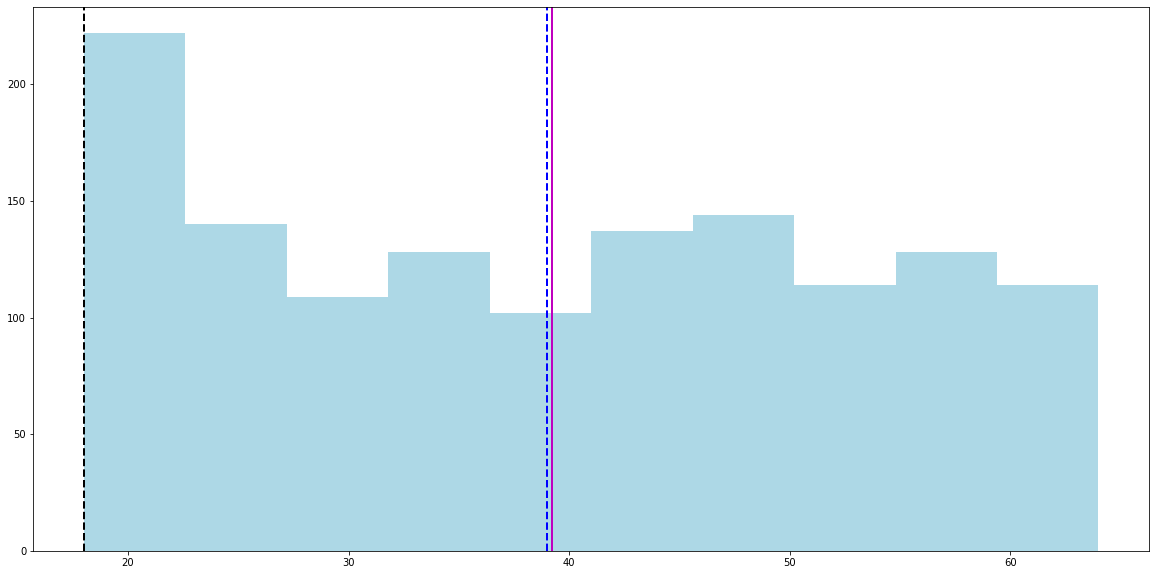

In [134]:
plt.figure(figsize=(20,10)) 
plt.hist(insurance_df['age'], color='lightblue',bins=10)
plt.axvline(insurance_df['age'].mean(), color='m', linewidth=2)
plt.axvline(insurance_df['age'].median(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(insurance_df['age'].mode()[0], color='black', linestyle='dashed', linewidth=2)

  <font color=darkblue>

# Distribution on Age:

- The above histogram on age is not a normalized data. 
- In this case, the insurer are mostly between 18 to 26, May be the risk of death/hospitalized is minimal for the ages between 18 to 26.
- Insured aged people >50 looks to be minimal on comparing with young/middle aged people
- From the above figure we can see the the mean is represented by the magenta line and the mode by the thick dashed black line . The median is represented by the thick blue line.
- We can see from the above figure that the mode is far away from the mean and median, mean and median are very close to each other. 

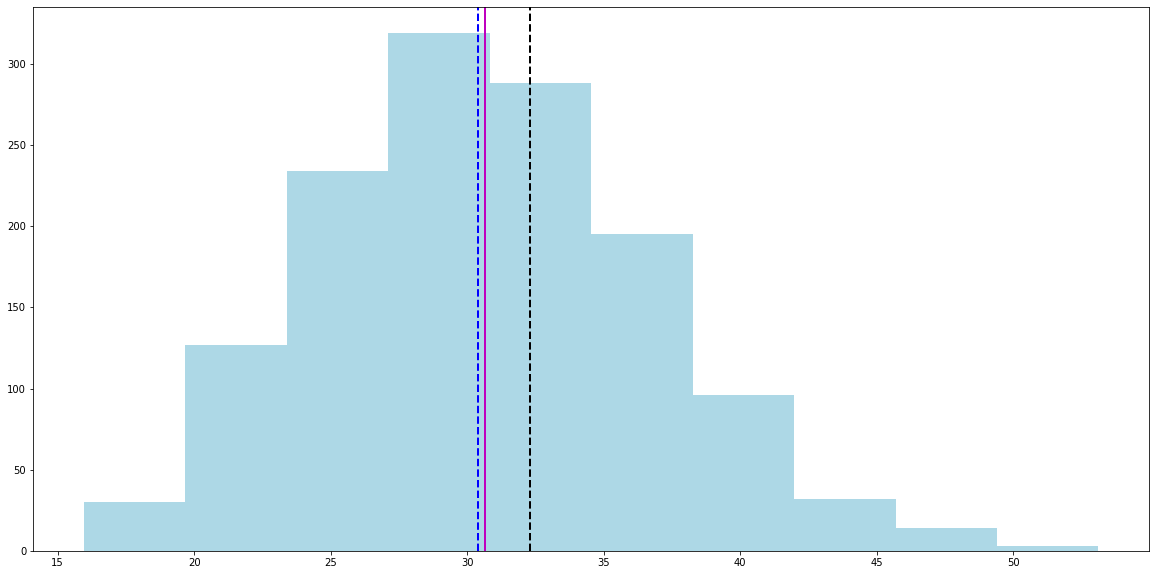

In [135]:
plt.figure(figsize=(20,10)) 
plt.hist(insurance_df['bmi'], color='lightblue',bins=10)
plt.axvline(insurance_df['bmi'].mean(), color='m', linewidth=2)
plt.axvline(insurance_df['bmi'].median(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(insurance_df['bmi'].mode()[0], color='black', linestyle='dashed', linewidth=2)

  <font color=darkblue>

# Distribution on BMI:

- Insurer with Ideal BMI ((18 to 25) is less in number. 
- In this case, the overweight persons( > 25 < 29) are looks to be maximum in number, which is a risk for the insurance business.
- Obese persons (BMI >29) is also greater which is showing the insurance business is at high risk.
- From the above figure we can see the the mean is represented by the magenta line and the mode by the thick dashed black line . The median is represented by the thick blue line.
- We can see from the above figure that the mode is greater than the mean and median, mean and median are very close to each other. 

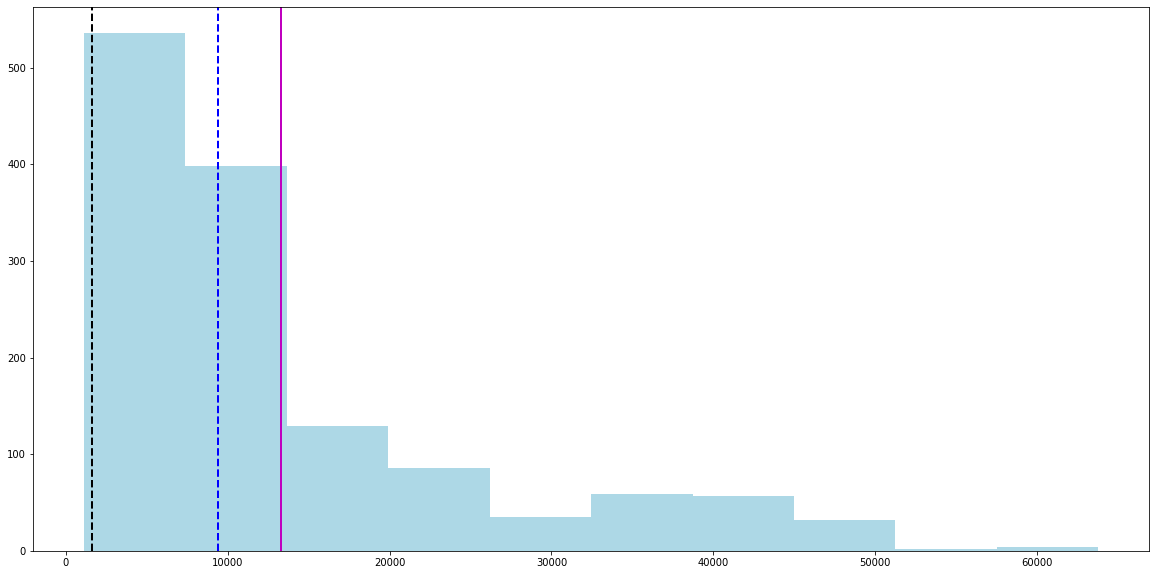

In [136]:
plt.figure(figsize=(20,10)) 
plt.hist(insurance_df['charges'], color='lightblue',bins=10)
plt.axvline(insurance_df['charges'].mean(), color='m', linewidth=2)
plt.axvline(insurance_df['charges'].median(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(insurance_df['charges'].mode()[0], color='black', linestyle='dashed', linewidth=2)

  <font color=darkblue>

# Distribution on Charges:

- Mostly the health insurance charges are looks to be between 2000 to 13000, which shows the 
 insures are mostly of middle class. 
- Seeing few high insurance packages above 35000 to 50000
- Seeing minimal persons have billed above 50000
- From the above figure we can see that the mean is represented by the magenta line 
  and the mode by the thick dashed black line . The median is represented by the thick blue line.
- We can see from the above figure that the mode is far way from the mean and median.

## f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [137]:
insurance_df.skew()[['age','bmi','charges']]

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

# Measure of skewness of age

In [138]:

age_mode =insurance_df['age'].mode()
age_median = insurance_df['age'].median()
age_mean = insurance_df['age'].mean()
print('Mode :',age_mode)
print('Median :',age_median)
print('Mean:',age_mean)
print ('Skewness on age :',insurance_df.skew()['age'])

if(age_mean > age_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')


Mode : 0    18
dtype: int64
Median : 39.0
Mean: 39.20702541106129
Skewness on age : 0.05567251565299186
Then the distribution is positively skewed.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


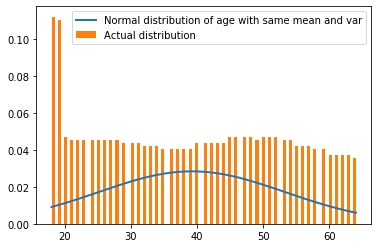

In [139]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(insurance_df['age'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of age with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

<font color=darkblue>

# Skewness on Age:
From the above hist plot,distribution is slight positively skewed with the Skewness of about = 0.05567251565299186 

# Measure of skewness of Charges

In [140]:

charge_mode =insurance_df['charges'].mode()
charge_median = insurance_df['charges'].median()
charge_mean = insurance_df['charges'].mean()
print('Mode:',charge_mode)
print('Median:',charge_median)
print('Mean:',charge_mean)
print ('Skewness on Charges :',insurance_df.skew()['charges'])


if(charge_mean > charge_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')


Mode: 0    1639.5631
dtype: float64
Median: 9382.033
Mean: 13270.422265141257
Skewness on Charges : 1.5158796580240388
Then the distribution is positively skewed.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


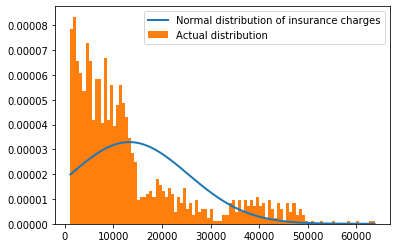

In [141]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(insurance_df['charges'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of insurance charges")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

<font color=darkblue>

# Skewness on Charges:
From the above hist plot, distribution is highly right/positively skewed with the Skewness of about = 1.5158796580240388 

# Measure of skewness of BMI:

In [451]:

bmi_mode =insurance_df['bmi'].mode()
bmi_median = insurance_df['bmi'].median()
bmi_mean = insurance_df['bmi'].mean()
print('Mode:',bmi_mode)
print('Median:',bmi_median)
print('Mean:',bmi_mean)
print ('Skewness on BMI :',insurance_df.skew()['bmi'])

if(bmi_mean > bmi_median ):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')


Mode: 0    32.3
dtype: float64
Median: 30.4
Mean: 30.663396860986538
Skewness on BMI : 0.2840471105987448
Then the distribution is positively skewed.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


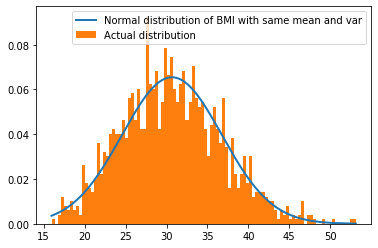

In [142]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(insurance_df['bmi'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of BMI with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

<font color=darkblue>

# Skewness on BMI:
From the above hist plot, distribution is positively skewed with the Skewness of about = 0.2840471105987448 

# 3. g. Checking the presence of outliers in ‘bmi’, ‘age’ and charges columns

# Checking the presence of Outliers for Charges

In [143]:
IQR_Charges = insurance_df["charges"].quantile(0.75) - insurance_df["charges"].quantile(0.25)

print('IQR_Charges -',IQR_Charges)

high_Wiskers_outlier = insurance_df["charges"].quantile(0.75) + 1.5*IQR_Charges
print('Higher outliers >',high_Wiskers_outlier)

low_Wiskers_outlier = insurance_df["charges"].quantile(0.25)  - 1.5*IQR_Charges
print('Lower outliers <',low_Wiskers_outlier)


IQR_Charges - 11899.625365
Higher outliers > 34489.350562499996
Lower outliers < -13109.1508975


Text(0.6, 8000, 'IQR')

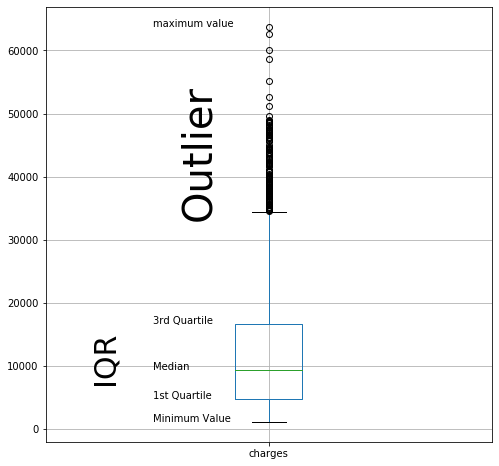

In [55]:
# Box Plot to show the outliers
insurance_df.boxplot(column="charges",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=16639, s="3rd Quartile")
plt.text(x=0.74, y=9382,  s="Median")
plt.text(x=0.74, y=4740,  s="1st Quartile")
plt.text(x=0.74, y=1121,  s="Minimum Value")
plt.text(x=0.74, y=63770,  s="maximum value")
plt.text(x=0.80, y=34489, s="Outlier", rotation=90, size=40)
plt.text(x=0.60, y=8000, s="IQR", rotation=90, size=30)

<font color=darkblue>

# Outliers on Charges:
Below are the observations from the above Boxplot
- IQR_Charges - 11899.625365
- Higher outliers > 34489.350562499996
- Lower outliers < -13109.1508975
- Charges above 34000 looks to be outliers. This data contains quite a large number of outliers.

# Checking the presence of Outliers for BMI

In [314]:
IQR_Bmi = insurance_df["bmi"].quantile(0.75) - insurance_df["bmi"].quantile(0.25)

print('IQR_BMI -',IQR_Bmi)

high_Wiskers_BMI_outlier = insurance_df["bmi"].quantile(0.75) + 1.5*IQR_Bmi
print('Higher outliers > ',high_Wiskers_BMI_outlier)

low_Wiskers_BMI_outlier = insurance_df["bmi"].quantile(0.25)  - 1.5*IQR_Bmi
print('Lower outliers < ',low_Wiskers_BMI_outlier)

IQR_BMI - 8.3975
Higher outliers >  47.290000000000006
Lower outliers <  13.7


Text(0.8, 47, 'Outlier')

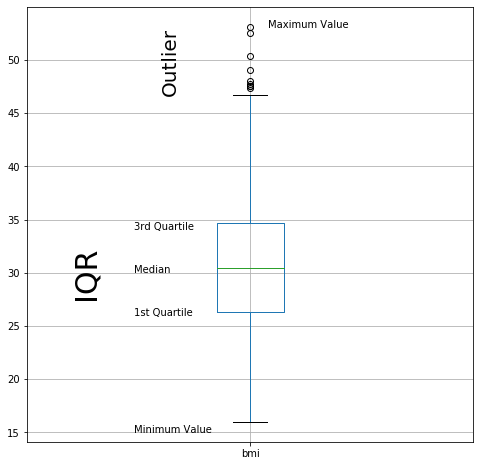

In [56]:
insurance_df.boxplot(column="bmi",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=34, s="3rd Quartile")
plt.text(x=0.74, y=30,  s="Median")
plt.text(x=0.74, y=26,  s="1st Quartile")
plt.text(x=0.74, y=15,  s="Minimum Value")
plt.text(x=1.04, y=53,  s="Maximum Value")
plt.text(x=0.60, y=28, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=47, s="Outlier", rotation=90, size=20)

<font color=darkblue>

# Outliers on BMI:

Below are the observations from the above Boxplot

- IQR_BMI - 8.3975
- Higher outliers >  47.290000000000006
- Lower outliers <  13.7
- Minimal outliers above 47BMI index

# Checking the presence of Outliers for AGE

In [356]:
IQR_age = insurance_df["age"].quantile(0.75) - insurance_df["age"].quantile(0.25)

print('IQR_AGE -',IQR_age)

high_Wiskers_AGE_outlier = insurance_df["age"].quantile(0.75) + 1.5*IQR_age
print('Higher outliers > ',high_Wiskers_AGE_outlier)

low_Wiskers_AGE_outlier = insurance_df["age"].quantile(0.25)  - 1.5*IQR_age
print('Lower outliers < ',low_Wiskers_AGE_outlier)

IQR_AGE - 24.0
Higher outliers >  87.0
Lower outliers <  -9.0


Text(1.3, 35, 'No Outliers')

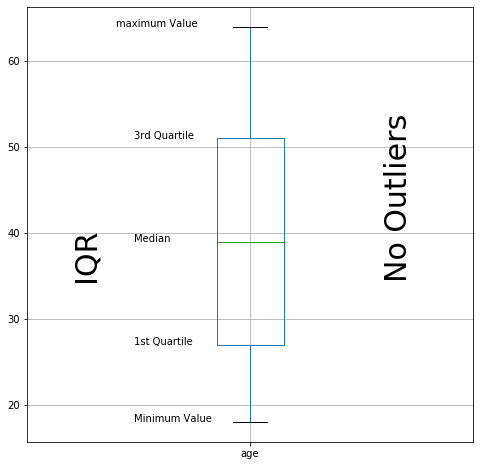

In [357]:
insurance_df.boxplot(column="age",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=51, s="3rd Quartile")
plt.text(x=0.74, y=39,  s="Median")
plt.text(x=0.74, y=27,  s="1st Quartile")
plt.text(x=0.74, y=18,  s="Minimum Value")
plt.text(x=0.70, y=64,  s="maximum Value")
plt.text(x=0.60, y=35, s="IQR", rotation=90, size=30)
plt.text(x=1.30, y=35, s="No Outliers", rotation=90, size=30)

<font color=darkblue>

# Outliers on Age:

Below are the observations from the above Boxplot

- IQR_AGE - 24.0
- Higher outliers >  87.0
- Lower outliers <  -9.0
- No Higher and lower Outliers

## 3. h. Distribution of categorical columns (include children)

In [144]:
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder = LabelEncoder()  

insurance_df_dummies = insurance_df
insurance_df_dummies['Num_Col_Sex'] = labelencoder.fit_transform(insurance_df_dummies.sex) 
insurance_df_dummies['Num_Col_Region'] = labelencoder.fit_transform(insurance_df_dummies.region)
insurance_df_dummies['Num_Col_Smoker'] = labelencoder.fit_transform(insurance_df_dummies.smoker) 

In [145]:
insurance_df_dummies

,age,sex,bmi,children,smoker,region,charges,Num_Col_Sex,Num_Col_Region,Num_Col_Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,3,1
1,18,male,33.770,1,no,southeast,1725.55230,1,2,0
2,28,male,33.000,3,no,southeast,4449.46200,1,2,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,2,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,3,0


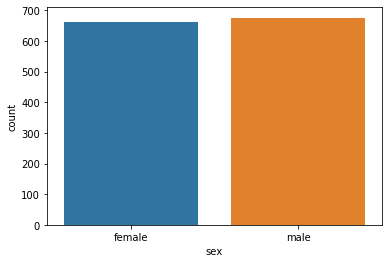

In [146]:
sns.countplot(x="sex", data=insurance_df_dummies)

(array([662.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 676.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

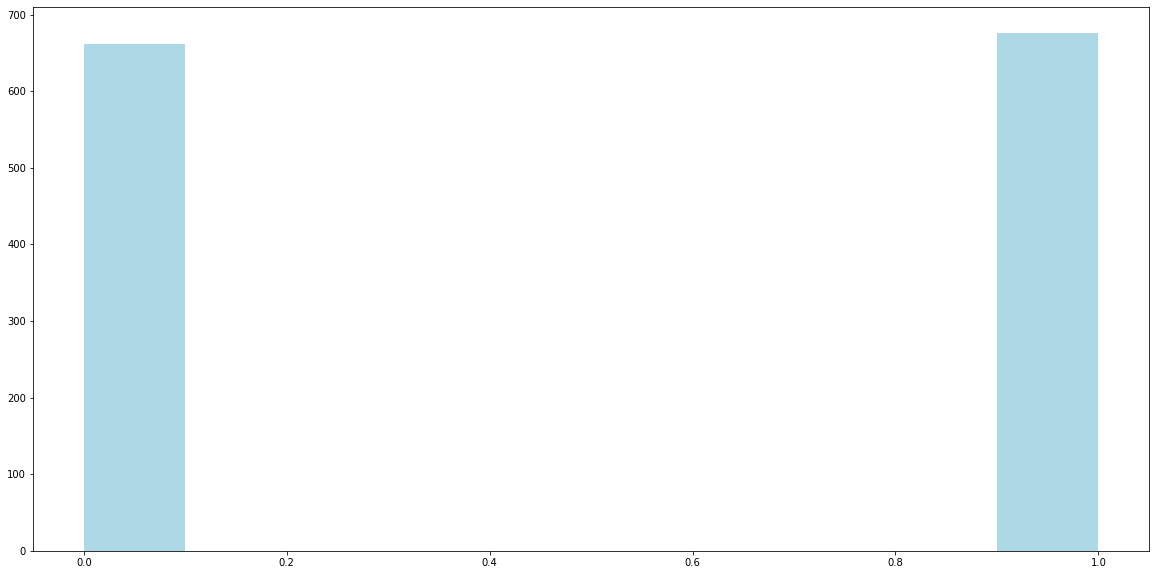

In [150]:
## Used one Hot encoding Technique to convert Categorical values to quantitative values
plt.figure(figsize=(20,10)) 
plt.hist(insurance_df_dummies['Num_Col_Sex'], color='lightblue')


<font color=darkblue>

# Observations from Distribution of Gender:

- Male insurer are more in number than the female
- On the above distribution 
    - 0 is Female 
    - 1 is Male

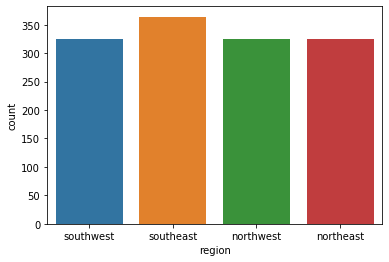

In [148]:
sns.countplot(x="region", data=insurance_df_dummies)

(array([324.,   0.,   0.,   0.,   0., 325.,   0.,   0.,   0.,   0., 364.,
          0.,   0.,   0., 325.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. ]),
 <a list of 15 Patch objects>)

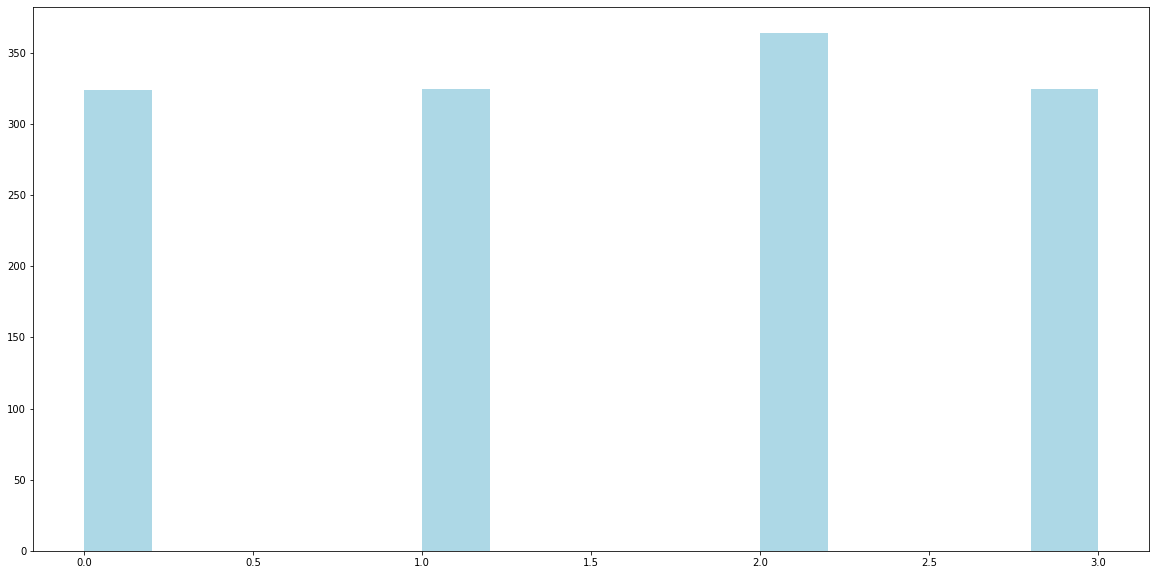

In [149]:
## Used one Hot encoding Technique to convert Categorical values to quantitative values
plt.figure(figsize=(20,10)) 
plt.hist(insurance_df_dummies['Num_Col_Region'], color='lightblue',bins=15)

<font color=darkblue>

# Observations from Distribution of Region:

- South East Region has more number of insurer.
- On the above distribution
    - 0 is north East
    - 1 is northwest
    - 2 is South East
    - 3 is South West 
-  Rest other Regions have the same# of insurer

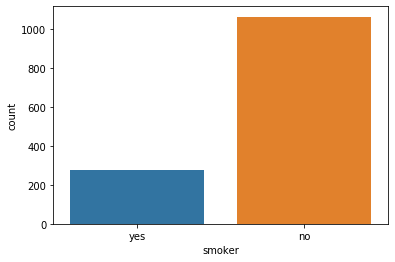

In [49]:
sns.countplot(x="smoker", data=insurance_df_dummies)

(array([1064.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  274.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <a list of 15 Patch objects>)

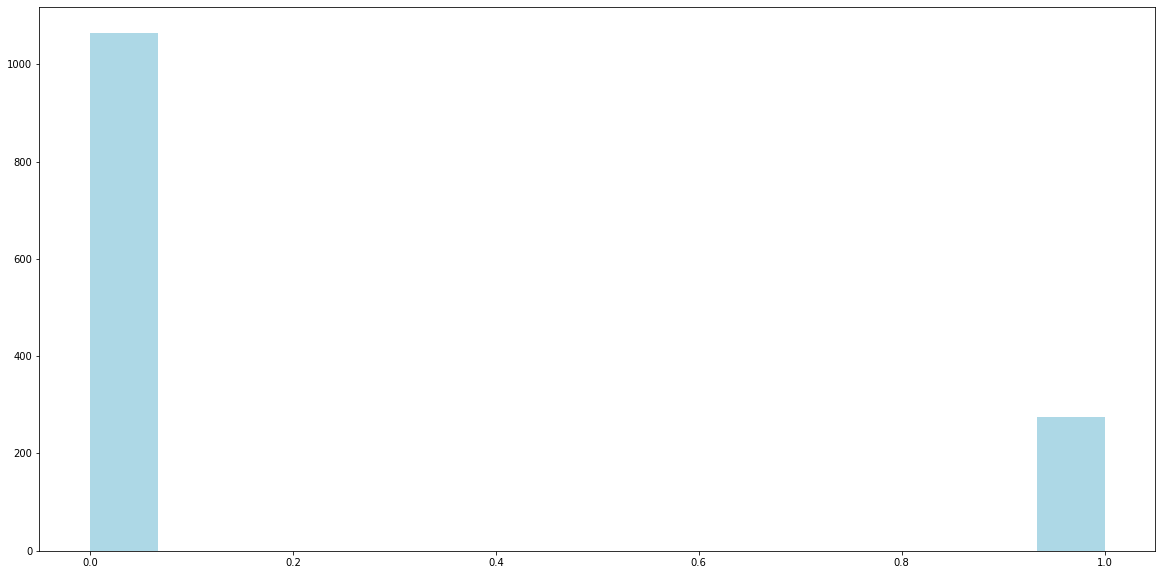

In [45]:
## Used one Hot encoding Technique to convert Categorical values to quantitative values
plt.figure(figsize=(20,10)) 
plt.hist(insurance_df_dummies['Num_Col_Smoker'], color='lightblue',bins=15)

<font color=darkblue>

# Observations from Distribution of Smokers:

- Non Smokers insured more than the smokers.
- On the above distribution 
        - 0 is Non SMoker 
        - 1 is Smoker

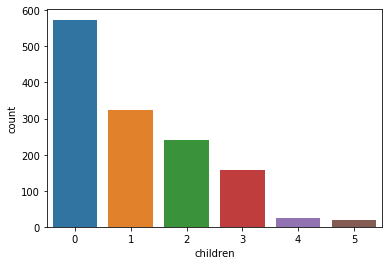

In [47]:
sns.countplot(x="children", data=insurance_df_dummies)

(array([574.,   0.,   0., 324.,   0.,   0., 240.,   0.,   0., 157.,   0.,
          0.,  25.,   0.,  18.]),
 array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
        1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ,
        3.33333333, 3.66666667, 4.        , 4.33333333, 4.66666667,
        5.        ]),
 <a list of 15 Patch objects>)

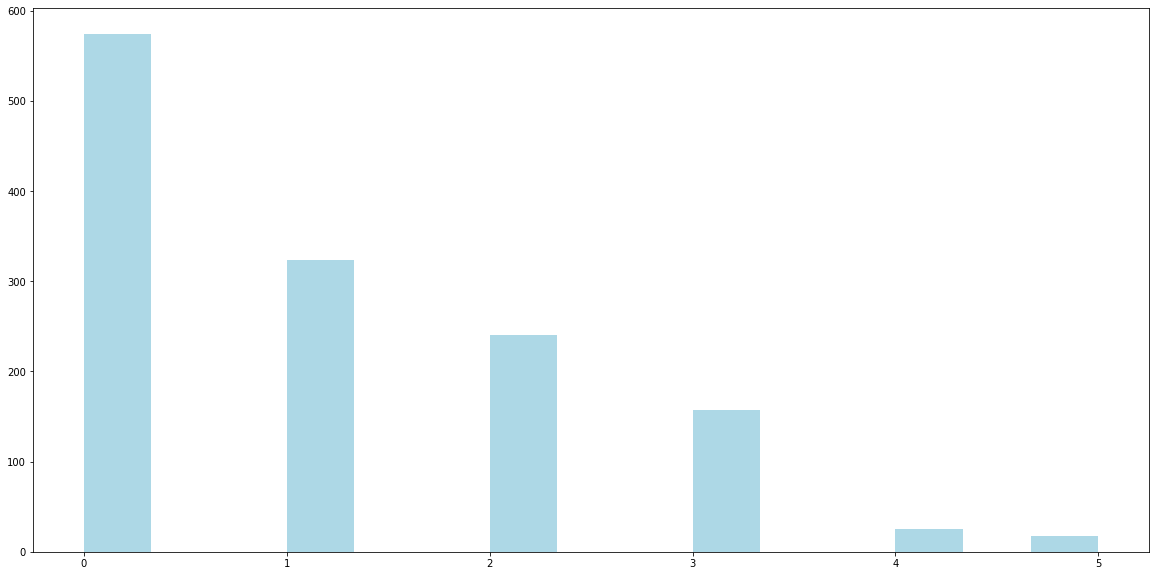

In [48]:
plt.figure(figsize=(20,10)) 
plt.hist(insurance_df_dummies['children'], color='lightblue',bins=15)

<font color=darkblue>

# Observations from Distribution of Children:

- Insurer with no children have insured more.
- Insurer with 5 childrens are less in number to insure.
- Insurer Decreases as the child numbers increases.


# 3. i. Pair plot that includes all the columns of the dataframe


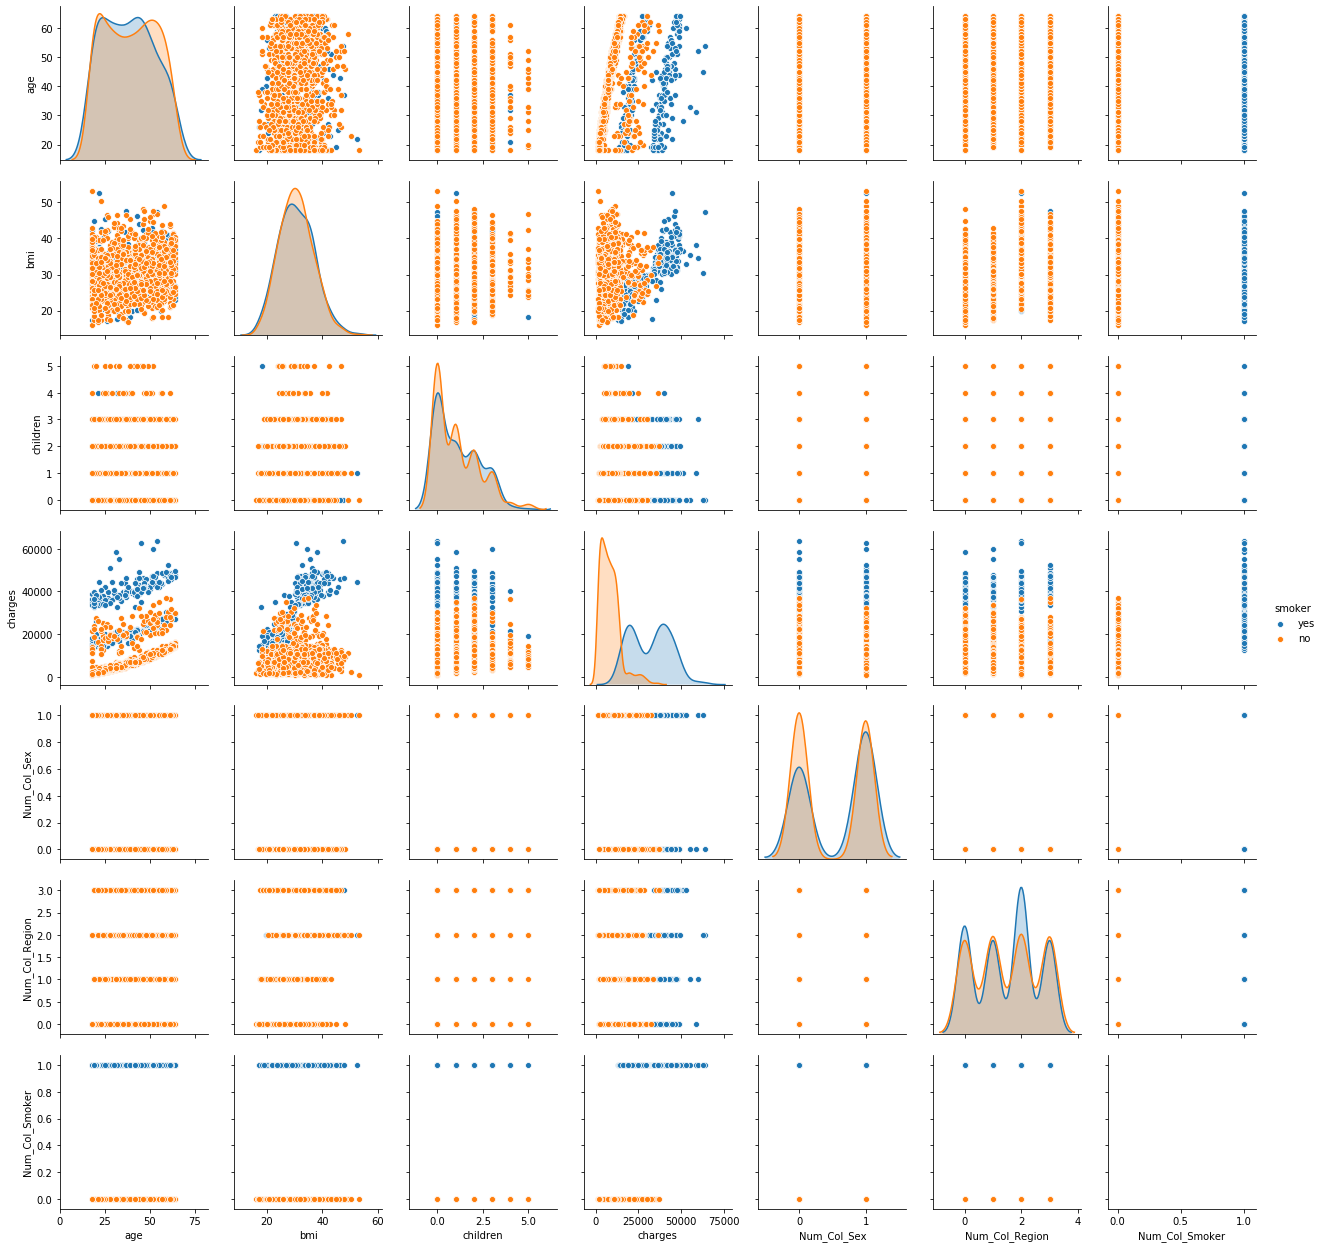

In [101]:
sns.pairplot(insurance_df_dummies,diag_kind='kde',hue='smoker')

<font color=darkblue>

# Observations from Pair Plot:

- Looks to be the Categorical column Smoker and charges are the good feature to work upon
- Wondering!! that the BMI of Smokers and non-smokers have almost same distribution and it looks to be almost normal

## 4. a. Do charges of people who smoke differ significantly from the people who don't?

In [102]:
insurance_df = pd.read_csv('D://PGP//Assignments//23Jul2020//insurance.csv')

In [235]:
#To check the distribution and proceed further
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

#Preparing the Data Set for charges_smoker and charges_non_smoker
charges_smoker  =  insurance_df[insurance_df['smoker'].astype({'smoker':'str'}) =='yes']['charges']
charges_non_smoker  =  insurance_df[insurance_df['smoker'].astype({'smoker':'str'}) =='no']['charges']

# Considering the Dataset to be normal as default
has_normal_charges_smoker = True
has_normal_charges_non_smoker =True

#Performing Shapiro for charges_smoker and finding the Data is normal or Not.

print('Performing Shapiro for charges_smoker to find the normality of Data \n')
stat_norm_smoker,p_norm_smoker = shapiro(charges_smoker)
print('stat_norm_smoker=%.3f, p_norm_smoker=%.4f'%(stat_norm_smoker,p_norm_smoker),'\n')
if p_norm_smoker > 0.05:
    print('Charges on Smoker has a normal distribution \n')
else:
    print ('Charges on Smoker is not a normal distribution \n')
    has_normal_charges_smoker =False
    
#Performing Shapiro for charges_non_smoker and finding the Data is normal or Not.

print('Performing Shapiro for charges_non_smoker to find the normality of Data \n')

stat_norm_nonSmoker,p_norm_nonSmoker = shapiro(charges_non_smoker)
print('stat_norm_nonSmoker=%.3f, p_norm_nonSmoker=%.4f'%(stat_norm_nonSmoker,p_norm_nonSmoker),'\n')
if p_norm_nonSmoker > 0.05:
    print('Charges on Non-Smoker has a normal distribution \n')
else:
    print ('Charges on Non-Smoker is not a normal distribution \n')
    has_normal_charges_non_smoker =False

#If Both the Charges on Smoker and Charges on Non-Smoker is normale we can use Parametric Statistical Testing    
if( has_normal_charges_smoker and has_normal_charges_non_smoker ):
        print ('Doing Parametric Statistical Testing as both the Distributions are normal \n')

        ttest_stat_Parametric, ttest_p_parametric = ttest_ind(charges_smoker, charges_non_smoker)
        print('ttest_stat_Parametric=%.3f, ttest_p_parametric=%.8f' % (ttest_stat_Parametric, ttest_p_parametric),'\n')
        if ttest_p_parametric > 0.05:
            print('Null Hypothesis: Charges of people who smoke are similar to the people Who are non smoker \n')
        else:
            print('Alternate Hypothesis: Charges of people who smoke differ significantly from the people Who are non smoker \n')

#If Both  charges_smoker and charges_non_smoker are not normale or any one dataset is not Normal
#we can use Non -Parametric Statistical Testing    

else:
    print ('Doing Non-Parametric Statistical Testing as both the Distributions are not normal \n')
    nonparametric_stat, nonparametric_p = mannwhitneyu(charges_smoker, charges_non_smoker)
    print('nonparametric_stat=%.3f, nonparametric_p=%.8f' % (nonparametric_stat, nonparametric_p),'\n')
    if nonparametric_p > 0.05:
        print('Null Hypothesis: Charges of people who smoke are similar to the people Who are non smoker \n')
    else:
        print('Alternate Hypothesis: Charges of people who smoke differ significantly from the people Who are non smoker \n') 

Performing Shapiro for charges_smoker to find the normality of Data 

stat_norm_smoker=0.940, p_norm_smoker=0.0000 

Charges on Smoker is not a normal distribution 

Performing Shapiro for charges_non_smoker to find the normality of Data 

stat_norm_nonSmoker=0.873, p_norm_nonSmoker=0.0000 

Charges on Non-Smoker is not a normal distribution 

Doing Non-Parametric Statistical Testing as both the Distributions are not normal 

nonparametric_stat=7403.000, nonparametric_p=0.00000000 

Alternate Hypothesis: Charges of people who smoke differ significantly from the people Who are non smoker 



In [236]:
# Eventhough the Distributions are not normal
# using parametric Statistical Test
from scipy.stats import ttest_ind

stat, p = ttest_ind(charges_smoker, charges_non_smoker)
print('stat=%.3f, p=%.300f' % (stat, p))

if p > 0.05:
    print('Null Hypothesis: Charges of people who smoke are similar to the people Who are non smoker')
else:
    print('Alternate Hypothesis: Charges of people who smoke differ significantly from the people Who are non smoker')

stat=46.665, p=0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000827143584217721865
Alternate Hypothesis: Charges of people who smoke differ significantly from the people Who are non smoker


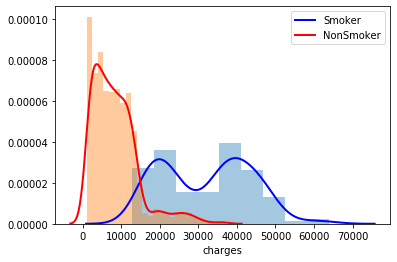

In [237]:
sns.distplot(charges_smoker,kde_kws={"color": "b", "lw": 2, "label": "Smoker"})
sns.distplot(charges_non_smoker,kde_kws={"color": "r", "lw": 2, "label": "NonSmoker"})

## b. Does bmi of males differ significantly from that of females

In [223]:
#To check the distribution and proceed further
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

#Preparing the Data Set for Male BMI and Female BMI
male_BMI  =  insurance_df[insurance_df['sex'].astype({'sex':'str'}) =='male']['bmi']
female_BMI  =  insurance_df[insurance_df['sex'].astype({'sex':'str'}) =='female']['bmi']

# Considering the Dataset to be normal as default
has_normal_male_BMI = True
has_normal_female_BMI =True

#Performing Shapiro for Male BMI and finding the Data is normal or Not.

print('Performing Shapiro for Male BMI to find the normality of Data \n')
stat_norm_male,p_norm_male = shapiro(male_BMI)
print('stat_norm_male=%.3f, p_norm_male=%.4f'%(stat_norm_male,p_norm_male),'\n')
if p_norm_male > 0.05:
    print('Male BMI has a normal distribution \n')
else:
    print ('Male BMI is not a normal distribution \n')
    has_normal_male_BMI =False
    
#Performing Shapiro for Female BMI and finding the Data is normal or Not.

print('Performing Shapiro for Female BMI to find the normality of Data \n')

stat_norm_female,p_norm_female = shapiro(female_BMI)
print('stat_norm_female=%.3f, p_norm_female=%.4f'%(stat_norm_female,p_norm_female),'\n')
if p_norm_female > 0.05:
    print('Female BMI has a normal distribution \n')
else:
    print ('Female BMI is not a normal distribution \n')
    has_normal_female_BMI =False

#If Both the Female_BMI and Male_BMI is normale we can use Parametric Statistical Testing    
if( has_normal_female_BMI and has_normal_male_BMI ):
        print ('Doing Parametric Statistical Testing as both the Distributions are normal \n')

        ttest_stat, ttest_p = ttest_ind(male_BMI, female_BMI)
        print('ttest_stat=%.3f, ttest_p=%.8f' % (ttest_stat, ttest_p),'\n')
        if ttest_p > 0.05:
            print('Null Hypothesis: BMI of Males Similar to Females BMI \n')
        else:
            print('Alternate Hypothesis: BMI of Males different from Females BMI \n')

#If Both  Female_BMI and Male_BMI are not normale or any one data is not Normal
#we can use Non -Parametric Statistical Testing    

else:
    print ('Doing Non-Parametric Statistical Testing as both the Distributions are not normal \n')
    np_stat, n_p = mannwhitneyu(male_BMI, female_BMI)
    print('np_stat=%.3f, n_p=%.8f' % (np_stat, n_p),'\n')
    if n_p > 0.05:
        print('Null Hypothesis: BMI of Males Similar to Females BMI \n')
    else:
        print('Alternate Hypothesis: BMI of Males different from Females BMI \n') 

Performing Shapiro for Male BMI to find the normality of Data 

stat_norm_male=0.993, p_norm_male=0.0031 

Male BMI is not a normal distribution 

Performing Shapiro for Female BMI to find the normality of Data 

stat_norm_female=0.993, p_norm_female=0.0035 

Female BMI is not a normal distribution 

Doing Non-Parametric Statistical Testing as both the Distributions are not normal 

np_stat=212180.000, n_p=0.05070064 

Null Hypothesis: BMI of Males Similar to Females BMI 



In [189]:
#Eventhough the distribution is not normal
# using parametric Statistical testing.
stat_BMI, p_BMI = ttest_ind(male_BMI, female_BMI)
print('stat_BMI=%.3f, p_BMI=%.8f' % (stat_BMI, p_BMI))
if p_BMI > 0.05:
    print('Null Hypothesis: BMI of Males Similar to Females BMI')
else:
    print('Alternate Hypothesis: BMI of Males different from Females BMI')

stat_BMI=1.697, p_BMI=0.08997637
Null Hypothesis: BMI of Males Similar to Females BMI


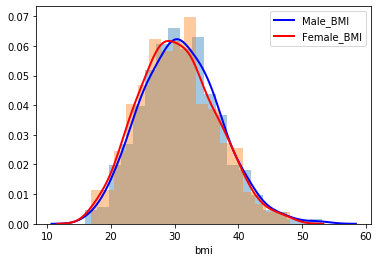

In [240]:
sns.distplot(male_BMI,kde_kws={"color": "b", "lw": 2, "label": "Male_BMI"})
sns.distplot(female_BMI,kde_kws={"color": "r", "lw": 2, "label": "Female_BMI"})

## c. Is the proportion of smokers significantly different in different genders?

In [230]:
# Using Chi Square as the comparison is on Categorical Values
from scipy.stats import chisquare

#Preparing the DataSet for Smokers for Male and Female
Smokers_male = insurance_df[insurance_df['smoker'].astype({'smoker':'str'}) =='yes'][insurance_df['sex'].astype({'sex':'str'}) =='male']['smoker'].count()
Smokers_female = insurance_df[insurance_df['smoker'].astype({'smoker':'str'}) =='yes'][insurance_df['sex'].astype({'sex':'str'}) =='female']['smoker'].count()


table = [[Smokers_male],[Smokers_female]]
stat, p = chisquare(table)
print('stat=%.8f, p=%.8f' % (stat, p))

if p > 0.05:
    print('NULL HYPOTHSIS - Proportion of smokers similar in male and female')
else:
    print('ALTERNATE HYPOTHESIS -Proportion of smokers different in male and female')

stat=7.06569343, p=0.00785739
ALTERNATE HYPOTHESIS -Proportion of smokers different in male and female


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


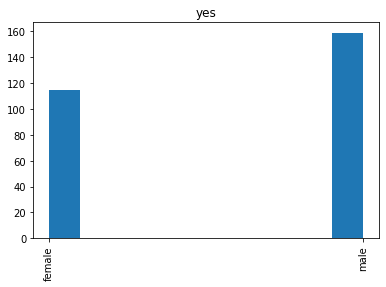

In [231]:
Smokers_on_both_gender = insurance_df[insurance_df['smoker'].astype({'smoker':'str'}) =='yes']


Smokers_on_both_gender.hist(by="smoker",column='sex')

## d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [241]:
#To check the distribution and proceed further
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import levene


#Preparing the Data Set for BMI_Women_NoChild, BMI_Women_OneChild and BMI_Women_TwoChild
BMI_Women_NoChild = insurance_df[insurance_df['sex'].astype({'sex':'str'}) =='female'][insurance_df['children'].astype({'children':'int64'})== 0]['bmi']
BMI_Women_OneChild = insurance_df[insurance_df['sex'].astype({'sex':'str'}) =='female'][insurance_df['children'].astype({'children':'int64'})== 1]['bmi']
BMI_Women_TwoChild = insurance_df[insurance_df['sex'].astype({'sex':'str'}) =='female'][insurance_df['children'].astype({'children':'int64'})== 2]['bmi']

# Considering the Dataset to be normal as default
has_normal_BMI_Women_NoChild = True
has_normal_BMI_Women_OneChild =True
has_normal_BMI_Women_TwoChild =True

# considering equality in variance as default

has_equal_variance_BMI_Women =True


#Performing Shapiro for BMI_Women_NoChild and finding the Data is normal or Not.

print('Performing Shapiro for BMI of Women with NoChild to find the normality of Data \n')
stat_norm_BMI_Women_NoChild,p_norm_BMI_Women_NoChild = shapiro(BMI_Women_NoChild)
print('stat_norm_BMI_Women_NoChild=%.3f, p_norm_BMI_Women_NoChild=%.4f'%(stat_norm_BMI_Women_NoChild,p_norm_BMI_Women_NoChild),'\n')
if p_norm_BMI_Women_NoChild > 0.05:
    print('BMI of women with No Child has a normal distribution \n')
else:
    print ('BMI of women with No Child is not a normal distribution \n')
    has_normal_BMI_Women_NoChild =False
    
#Performing Shapiro for BMI_Women_OneChild and finding the Data is normal or Not.

print('Performing Shapiro for BMI of Women with OneChild to find the normality of Data \n')

stat_norm_BMI_Women_OneChild,p_norm_BMI_Women_OneChild = shapiro(BMI_Women_OneChild)
print('stat_norm_BMI_Women_OneChild=%.3f, p_norm_BMI_Women_OneChild=%.4f'%(stat_norm_BMI_Women_OneChild,p_norm_BMI_Women_OneChild),'\n')
if p_norm_BMI_Women_OneChild > 0.05:
    print('BMI of women with One Child has a normal distribution \n')
else:
    print ('BMI of women with One Child is not a normal distribution \n')
    has_normal_BMI_Women_OneChild =False
    
    
#Performing Shapiro for BMI_Women_TwoChild and finding the Data is normal or Not.

print('Performing Shapiro for BMI of Women with Two Child to find the normality of Data \n')

stat_norm_BMI_Women_TwoChild,p_norm_BMI_Women_TwoChild = shapiro(BMI_Women_TwoChild)
print('stat_norm_BMI_Women_TwoChild=%.3f, p_norm_BMI_Women_TwoChild=%.4f'%(stat_norm_BMI_Women_TwoChild,p_norm_BMI_Women_TwoChild),'\n')
if p_norm_BMI_Women_TwoChild > 0.05:
    print('BMI of women with Two Child has a normal distribution \n')
else:
    print ('BMI of women with Two Child is not a normal distribution \n')
    has_normal_BMI_Women_TwoChild =False
    
    
# Checking the Variance for  BMI_Women_NoChild,BMI_Women_OneChild and BMI_Women_TwoChild

print('Performing Levenes Test for BMI of Women with NoChild, One child and two child to find the equality of Variance \n')
stat_Variance_BMI_Women,p_variance_BMI_Women = levene(BMI_Women_NoChild,BMI_Women_OneChild,BMI_Women_TwoChild)
print('stat_Variance_BMI_Women=%.3f, p_variance_BMI_Women=%.4f'%
      (stat_Variance_BMI_Women,p_variance_BMI_Women),'\n')
if p_variance_BMI_Women > 0.05:
    print('BMI of women with No Child,one Child and two Child has a equality in variance \n')
else:
    print ('BMI of women with No Child, one child and two child has a different in variance \n')
    has_equal_variance_BMI_Women = False
    

#If all the BMI_Women_NoChild,BMI_Women_One_Child and BMI_Women_Two_Child is normal distributed
#we can use Parametric Statistical Testing    
if( has_normal_BMI_Women_NoChild and has_normal_BMI_Women_OneChild and has_normal_BMI_Women_TwoChild 
      and has_equal_variance_BMI_Women):
        print ('Doing Parametric Statistical Testing as all the Distributions are normal \n')

        BMI_ANOVA_stat, BMI_ANOVA_p = f_oneway(BMI_Women_NoChild, BMI_Women_OneChild,BMI_Women_TwoChild)
        print('BMI_ANOVA_stat=%.3f, BMI_ANOVA_p=%.8f' % (BMI_ANOVA_stat, BMI_ANOVA_p),'\n')
        if BMI_ANOVA_p > 0.05:
            print('Null Hypothesis : Distribution of BMI across women with no children, one child and two children, are same \n')
        else:
            print('Alternate Hypothesis : Distribution of BMI across women with no children, one child and two children, are different  \n')

#If all the  BMI_Women_NoChild,BMI_Women_One_Child and BMI_Women_Two_Child are not normale or any one data is not Normal
#we can use Non -Parametric Statistical Testing    

else:
    print ('Doing Non-Parametric Statistical Testing as any one of the Distributions is not normal \n')
    non_parametric_kruskal_stat, non_parametric_kruskal_p = kruskal(BMI_Women_NoChild, BMI_Women_OneChild,BMI_Women_TwoChild)
    print('non_parametric_kruskal_stat=%.3f, non_parametric_kruskal_p=%.8f'
          % (non_parametric_kruskal_stat, non_parametric_kruskal_p),'\n')
    if non_parametric_kruskal_p > 0.05:
        print('Null Hypothesis : Distribution of BMI across women with no children, one child and two children, are same  \n')
    else:
        print('Alternate Hypothesis : Distribution of BMI across women with no children, one child and two children, are different \n') 

Performing Shapiro for BMI of Women with NoChild to find the normality of Data 

stat_norm_BMI_Women_NoChild=0.990, p_norm_BMI_Women_NoChild=0.0376 

BMI of women with No Child is not a normal distribution 

Performing Shapiro for BMI of Women with OneChild to find the normality of Data 

stat_norm_BMI_Women_OneChild=0.992, p_norm_BMI_Women_OneChild=0.5362 

BMI of women with One Child has a normal distribution 

Performing Shapiro for BMI of Women with Two Child to find the normality of Data 

stat_norm_BMI_Women_TwoChild=0.986, p_norm_BMI_Women_TwoChild=0.2596 

BMI of women with Two Child has a normal distribution 

Performing Levenes Test for BMI of Women with NoChild, One child and two child to find the equality of Variance 

stat_Variance_BMI_Women=0.943, p_variance_BMI_Women=0.3899 

BMI of women with No Child,one Child and two Child has a equality in variance 

Doing Non-Parametric Statistical Testing as any one of the Distributions is not normal 

non_parametric_kruskal_stat=0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [228]:
# Eventhough the Distribution is not normal, chekcing the Pvalue in Parametric Statistical Testing

from scipy.stats import f_oneway

stat, p = f_oneway(BMI_Women_NoChild, BMI_Women_OneChild, BMI_Women_TwoChild)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
        print('Null Hypothesis : Distribution of BMI across women with no children, one child and two children, are same')
else:
    print('Alternate Hypothesis : Distribution of BMI across women with no children, one child and two children, are different ')

stat=0.334, p=0.716
Null Hypothesis : Distribution of BMI across women with no children, one child and two children, are same


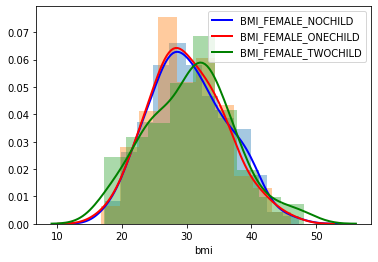

In [229]:
sns.distplot(BMI_Women_NoChild,kde_kws={"color": "b", "lw": 2, "label": "BMI_FEMALE_NOCHILD"})
sns.distplot(BMI_Women_OneChild,kde_kws={"color": "r", "lw": 2, "label": "BMI_FEMALE_ONECHILD"})
sns.distplot(BMI_Women_TwoChild,kde_kws={"color": "g", "lw": 2, "label": "BMI_FEMALE_TWOCHILD"})